# CANCER RATE BEFORE AND AFTER CHERNOBYL

In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [69]:
## reading the data set
Data=pd.read_csv('../Datasets/cancer_before_and_after_Chernobyl_Belarus.csv')

In [70]:
print('Number of Columns is = ',Data.shape[1])
print('Number of Rows is = ',Data.shape[0])

Number of Columns is =  5
Number of Rows is =  84


In [71]:
Data.head()

,year,sex,location,cancer_type,cases
0,1985,women,Gomel,skin,17.3
1,1985,women,Mogilev,skin,16.8
2,1986,women,Gomel,skin,15.6
3,1986,women,Mogilev,skin,18.3
4,1985,women,Belarus,skin,14.9


In [72]:
Data.info( )


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   year         84 non-null     int64  
 1   sex          84 non-null     object 
 2   location     84 non-null     object 
 3   cancer_type  84 non-null     object 
 4   cases        84 non-null     float64
dtypes: float64(1), int64(1), object(3)
memory usage: 3.4+ KB


In [73]:
Data.isnull().any()

year           False
sex            False
location       False
cancer_type    False
cases          False
dtype: bool

In [74]:
##PRINTING THE DATA COLUMN
print(Data.columns)

Index(['year', 'sex', 'location', 'cancer_type', 'cases'], dtype='object')


In [75]:
Data['year'].value_counts()

1985    42
1986    42
Name: year, dtype: int64

In [76]:
Data['sex'].value_counts()

women    42
men      42
Name: sex, dtype: int64

In [77]:
Data['location'].value_counts()

Gomel      28
Mogilev    28
Belarus    28
Name: location, dtype: int64

In [78]:
Data['cancer_type'].value_counts()

skin        12
thyroid     12
lungs       12
pancreas    12
colon       12
rectum      12
kidney      12
Name: cancer_type, dtype: int64

FOR ABOVE WE KNOW THE DATA CONTAIN 5 COLUMNS :-

YEAR(1985 , 1986)

SEX (Male , Female)

LOCATION(Gomel,Mogilev,Belarus)

CANCER-TYPE(skin,thyroid,lungs,pancreas,colon,rectum,kidney)

CASES(OUT OF 100)

In [79]:
GroupByLocation=Data.groupby(['location','year'])['cases']
print(GroupByLocation.mean())


location  year
Belarus   1985     8.678571
          1986    12.392857
Gomel     1985     8.314286
          1986    11.664286
Mogilev   1985     9.921429
          1986    13.157143
Name: cases, dtype: float64


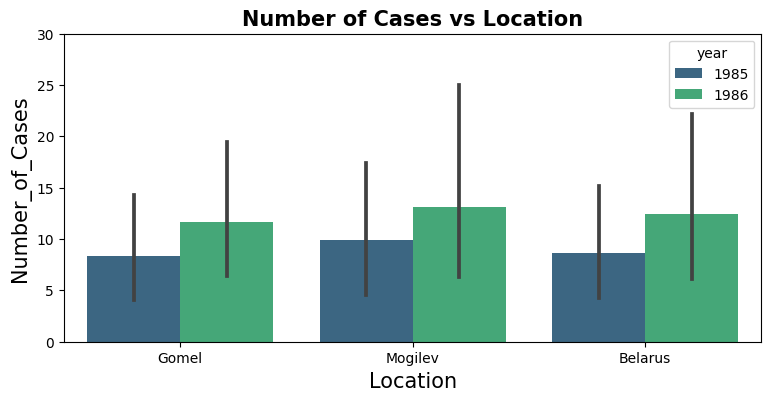

In [80]:
plt.figure(figsize=(9,4))
plt.title('Number of Cases vs Location',fontweight='bold',fontsize=15)
sns.barplot(x='location',y='cases',data=Data,hue='year',palette="viridis")
plt.xticks(rotation=0)
plt.xlabel('Location',fontsize=15)
plt.ylabel('Number_of_Cases',fontsize=15)
plt.ylim(0,30)
plt.show( )

In [81]:
GroupByGender=Data.groupby(['sex','year'])['cases']
print(GroupByGender.mean())

sex    year
men    1985    12.576190
       1986    17.847619
women  1985     5.366667
       1986     6.961905
Name: cases, dtype: float64


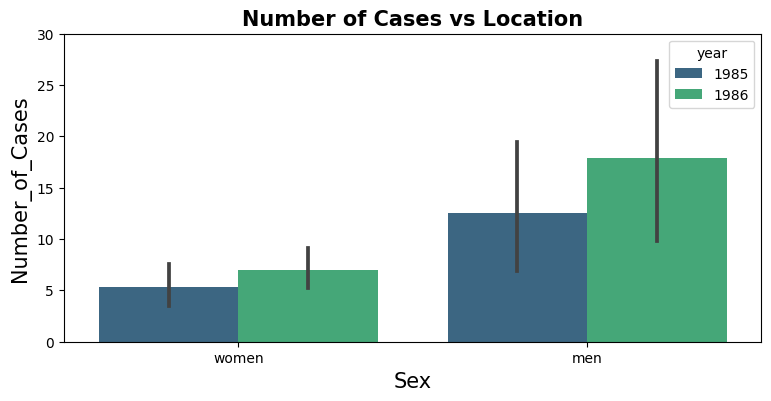

In [82]:
plt.figure(figsize=(9,4))
plt.title('Number of Cases vs Location',fontweight='bold',fontsize=15)
sns.barplot(x='sex',y='cases',data=Data,hue='year',palette="viridis")
plt.xticks(rotation=0)
plt.xlabel('Sex',fontsize=15)
plt.ylabel('Number_of_Cases',fontsize=15)
plt.ylim(0,30)
plt.show( )

In [83]:
GroupByType=Data.groupby(['cancer_type','year'])['cases']
print(GroupByType.mean())

cancer_type  year
colon        1985     5.400000
             1986     8.116667
kidney       1985     2.416667
             1986     5.066667
lungs        1985    24.450000
             1986    35.733333
pancreas     1985     4.666667
             1986     6.066667
rectum       1985     7.033333
             1986     9.683333
skin         1985    17.766667
             1986    18.866667
thyroid      1985     1.066667
             1986     3.300000
Name: cases, dtype: float64


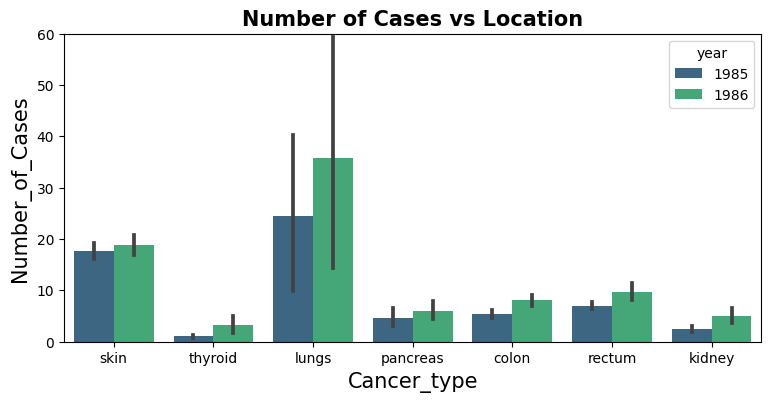

In [84]:
plt.figure(figsize=(9,4))
plt.title('Number of Cases vs Location',fontweight='bold',fontsize=15)
sns.barplot(x='cancer_type',y='cases',data=Data,hue='year',palette="viridis")
plt.xticks(rotation=0)
plt.xlabel('Cancer_type',fontsize=15)
plt.ylabel('Number_of_Cases',fontsize=15)
plt.ylim(0,60)
plt.show( )

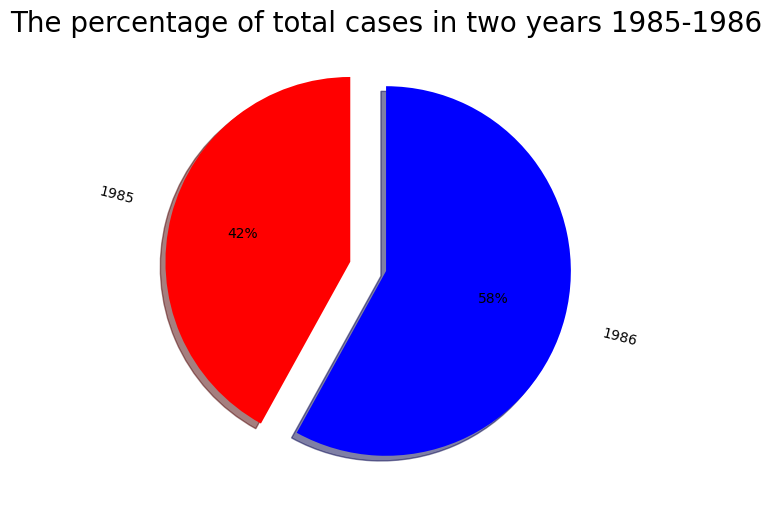

In [85]:
Y1=Data[Data['year']==1985]['cases'].sum()
Y2=Data[Data['year']==1986]['cases'].sum()

z=[Y1,Y2]
ex=[0.2,0.]
Lab=[1985,1986]
col=['red','blue']
plt.figure(figsize=(15,6))
plt.title('The percentage of total cases in two years 1985-1986',fontsize=20)
plt.pie(z,labels=Lab,shadow=True,
        startangle=90,
        explode=ex,
        autopct='%1.0F%%',
        rotatelabels=True,
        colors=col,
        labeldistance=1.2)
plt.show( )

# CALCULATING CANCER RATE

### FOR YEAR 1977-1985

In [86]:
total_cases=Data[Data['year']==1985]['cases'].sum()
total_people=(Data[Data['year']==1985]['cases'].count())

print("THE CANCER RATE IN YEAR 1977-1985: ",total_cases/total_people)


THE CANCER RATE IN YEAR 1977-1985:  8.971428571428573


### FOR YEAR 1986-1994

In [87]:
total_cases2=Data[Data['year']==1986]['cases'].sum()
total_people2=(Data[Data['year']==1986]['cases'].count())

print("THE CANCER RATE IN YEAR 1986-1994: ",total_cases2/total_people2)

THE CANCER RATE IN YEAR 1986-1994:  12.404761904761905


### THE INCREASE IN CANCER RATE FROM PERIOD (1977-1985) to (1986-1994)

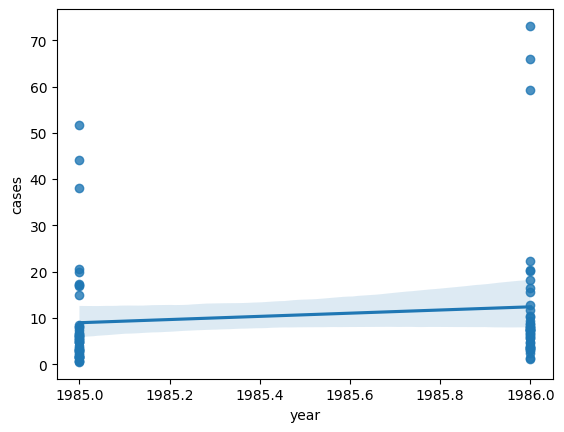

In [88]:
sns.regplot(y="cases", x = "year", data=Data);

### CANCER RATE IN DIFFERENT CANCER TYPE BEFORE AND AFTER CHEYNOBYL

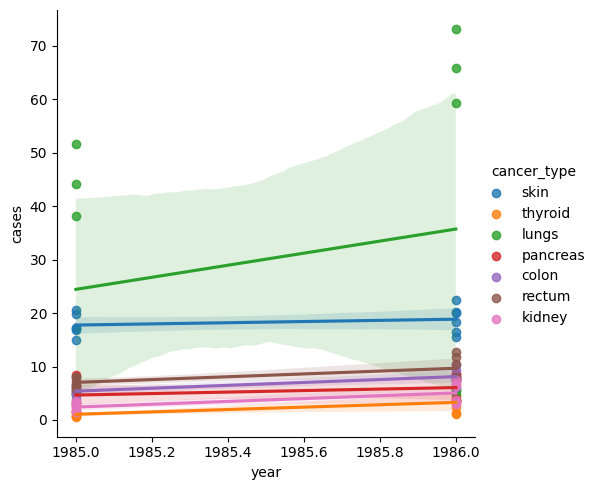

In [89]:
sns.lmplot(y="cases", x = "year", hue="cancer_type", data=Data);

### CANCER RATE IN MALE AND FEMALE BEFORE AND AFTER CHEYNOBYL

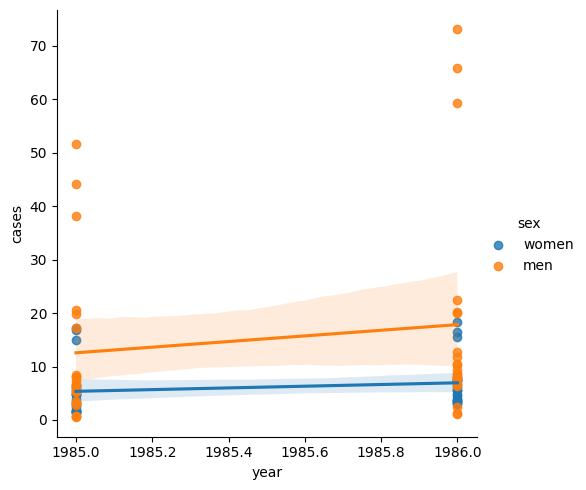

In [90]:
sns.lmplot(y="cases", x = "year", hue="sex", data=Data);

### CANCER RATE IN DIFFERENT PLACES BEFORE AND AFTER CHEYNOBYL

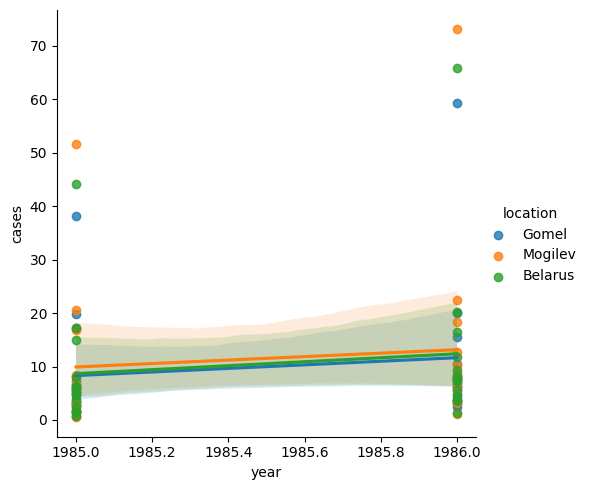

In [91]:
sns.lmplot(y="cases", x = "year", hue="location", data=Data);

## INCREASE IN CANCER RATE AFTER CHERNOBYL

In [92]:
rate1=total_cases/total_people
rate2=total_cases2/total_people2
print("The increase in cancer rate is:-",((rate2-rate1)/rate1))

The increase in cancer rate is:- 0.38269639065817385


### INCREASE CANCER RATE IN GENDER AFTER CHERNOBYL

In [93]:
total_cases=Data.groupby(['sex','year'])['cases'].sum()
total_people=Data.groupby(['sex','year'])['cases'].count()
print(total_cases,total_people)

sex    year
men    1985    264.1
       1986    374.8
women  1985    112.7
       1986    146.2
Name: cases, dtype: float64 sex    year
men    1985    21
       1986    21
women  1985    21
       1986    21
Name: cases, dtype: int64


In [94]:
print("The increase in cancer rate in male after chernobyl: ",((374.8/21)-(264.1/21))/(264.1/21))
print("The increase in cancer rate in female after chernobyl: ",((146.2/21)-(112.7/21))/(112.7/21))

The increase in cancer rate in male after chernobyl:  0.4191594093146534
The increase in cancer rate in female after chernobyl:  0.297249334516415


### INCREASE CANCER RATE IN CANCER TYPE AFTER CHERNOBYL

In [95]:
total_cases=Data.groupby(['cancer_type','year'])['cases'].sum()
total_people=Data.groupby(['cancer_type','year'])['cases'].count()
print(total_cases)

cancer_type  year
colon        1985     32.4
             1986     48.7
kidney       1985     14.5
             1986     30.4
lungs        1985    146.7
             1986    214.4
pancreas     1985     28.0
             1986     36.4
rectum       1985     42.2
             1986     58.1
skin         1985    106.6
             1986    113.2
thyroid      1985      6.4
             1986     19.8
Name: cases, dtype: float64


In [96]:
print(total_people)

cancer_type  year
colon        1985    6
             1986    6
kidney       1985    6
             1986    6
lungs        1985    6
             1986    6
pancreas     1985    6
             1986    6
rectum       1985    6
             1986    6
skin         1985    6
             1986    6
thyroid      1985    6
             1986    6
Name: cases, dtype: int64


In [97]:
print("The increase in cancer rate in colon after chernobyl: ",((48.7/6)-(32.4/6))/(32.4/6))
print("The increase in cancer rate in kidney after chernobyl: ",((30.4/6)-(14.5/6))/(14.5/6))
print("The increase in cancer rate in lungs after chernobyl: ",((214.4/6)-(146.7/6))/(146.7/6))
print("The increase in cancer rate in pancreas after chernobyl: ",((36.4/6)-(28.0/6))/(28.0/6))
print("The increase in cancer rate in rectum after chernobyl: ",((58.1/6)-(42.2/6))/(42.2/6))
print("The increase in cancer rate in skin after chernobyl: ",((113.2/6)-(106.6/6))/(106.6/6))
print("The increase in cancer rate in thyroid after chernobyl: ",((19.8/6)-(6.4/6))/(6.4/6))

The increase in cancer rate in colon after chernobyl:  0.5030864197530867
The increase in cancer rate in kidney after chernobyl:  1.096551724137931
The increase in cancer rate in lungs after chernobyl:  0.4614860259032039
The increase in cancer rate in pancreas after chernobyl:  0.2999999999999999
The increase in cancer rate in rectum after chernobyl:  0.376777251184834
The increase in cancer rate in skin after chernobyl:  0.061913696060037604
The increase in cancer rate in thyroid after chernobyl:  2.09375


### INCREASE CANCER RATE IN DIFFERENT LOCATION AFTER CHERNOBYL

In [98]:
total_cases=Data.groupby(['location','year'])['cases'].sum()
total_people=Data.groupby(['location','year'])['cases'].count()
print(total_cases,total_people)

location  year
Belarus   1985    121.5
          1986    173.5
Gomel     1985    116.4
          1986    163.3
Mogilev   1985    138.9
          1986    184.2
Name: cases, dtype: float64 location  year
Belarus   1985    14
          1986    14
Gomel     1985    14
          1986    14
Mogilev   1985    14
          1986    14
Name: cases, dtype: int64


In [99]:
print("The increase in cancer rate in Belarus after chernobyl: ",((173.5/14)-(121.5/14))/(121.5/14))
print("The increase in cancer rate in Gomel after chernobyl: ",((163.3/14)-(116.4/14))/(116.4/14))
print("The increase in cancer rate in Mogilev after chernobyl: ",((184.2/14)-(138.9/14))/(138.9/14))

The increase in cancer rate in Belarus after chernobyl:  0.4279835390946501
The increase in cancer rate in Gomel after chernobyl:  0.4029209621993126
The increase in cancer rate in Mogilev after chernobyl:  0.32613390928725683


## CONCLUSION

1- Cancer rate increased after chernobel by 38%

2- Increase of rate in men > women.

3-Increase of rate in thyroid > kidney > colon > lungs > rectum > pancreas > skin.

4- Increase of rate in  Belarus > Gomel > Mogilev.